In [172]:
import cirq

## TASK 1

In [173]:
# task 1
length = 5
(q0,q1,q2,q3,q4) = cirq.LineQubit.range(length)

circuit = cirq.Circuit()
circuit.append([cirq.H(q0),cirq.H(q1),cirq.H(q2),cirq.H(q3),cirq.H(q4)])
circuit.append([cirq.CNOT(q0,q1),cirq.CNOT(q1,q2),cirq.CNOT(q2,q3),cirq.CNOT(q3,q4)])
circuit.append(cirq.SWAP(q0,q4))
rot = cirq.XPowGate(exponent = 1)
circuit.append([rot(q0),rot(q1),rot(q2),rot(q3),rot(q4)])
print(circuit)

                          ┌──┐
0: ───H───@────────────────×─────X───
          │                │
1: ───H───X───@───X────────┼─────────
              │            │
2: ───H───────X───@───X────┼─────────
                  │        │
3: ───H───────────X───@────┼X────────
                      │    │
4: ───H───────────────X────×─────X───
                          └──┘


## TASK 2

In [174]:
# task 2
cir2 = cirq.Circuit()
q = cirq.LineQubit(1)
for i in range(100):
    cir2.append(cirq.Rx(0.1)(q))
    cir2.append(cirq.measure(q,key=("x"+str(i))))

/home/dibyakanti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Rx was used but is deprecated.
It will be removed in cirq v0.8.0.
Use cirq.rx, instead.

  """


In [175]:
# print(cir2)

In [176]:
simulator = cirq.Simulator()
result = simulator.run(cir2,repetitions = 1000)

In [177]:
xp = []
for i in range(100):
    xp.append((1000 - int(result.measurements["x"+str(i)][:,0][result.measurements["x"+str(i)][:,0]==1].sum()))/1000)
    

In [178]:
import seaborn as sns
type(xp)

list

Text(0, 0.5, 'Probability')

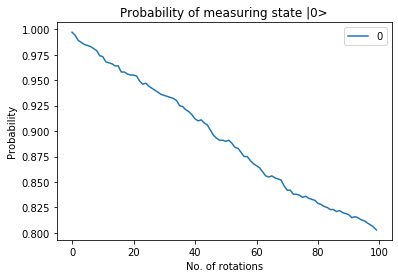

In [179]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(xp)
sns.lineplot(data = df)
plt.title("Probability of measuring state |0>")
plt.xlabel("No. of rotations")
plt.ylabel("Probability")